In [ ]:
from sklearn import datasets

In [ ]:
iris=datasets.load_iris()

In [ ]:
irisX=iris.data

In [ ]:
irisY=iris.target

In [ ]:
irisX.shape

(150, 4)

In [ ]:
irisY.shape

(150,)

In [ ]:
irisY

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

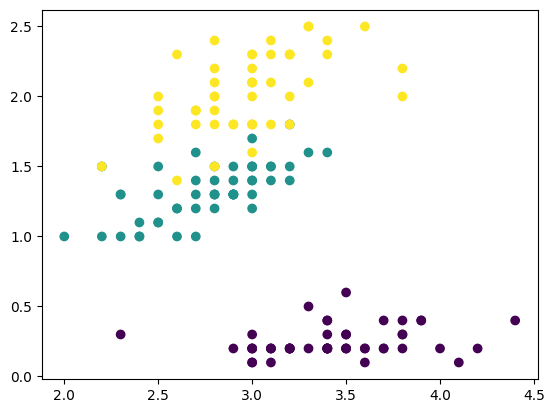

In [ ]:
x=irisX[:,1]
y=irisX[:,3]
plt.scatter(x,y,c=irisY)

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
model=TSNE()

In [ ]:
tsne2d=model.fit_transform(irisX)

In [ ]:
tsne2d.shape

(150, 2)

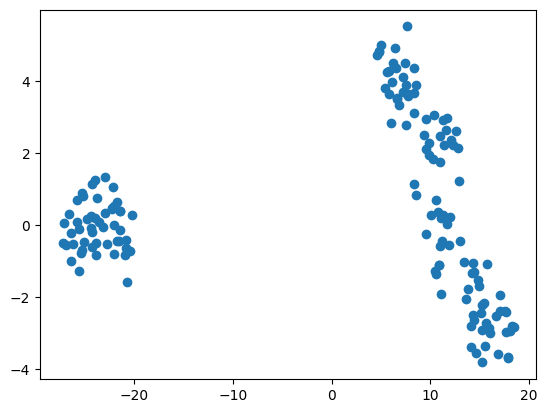

In [ ]:
x=tsne2d[:,0]
y=tsne2d[:,1]
plt.scatter(x,y)

In [ ]:
model=TSNE(n_components=3)
tsne3=model.fit_transform(irisX)

In [ ]:
tsne3.shape

(150, 3)

In [ ]:
import plotly.express as px

In [ ]:
fig=px.scatter_3d(tsne3,x=0,y=1,z=2,color=irisY)#color=irisY
fig.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
scaler.fit(irisX)

StandardScaler()

In [ ]:
irisX_std=scaler.transform(irisX)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA()

In [ ]:
pca.fit(irisX_std)

PCA()

In [ ]:
explained_variance=np.cumsum(pca.explained_variance_ratio_)
explained_variance

array([0.72962445, 0.95813207, 0.99482129, 1.        ])

In [ ]:
pca=PCA(n_components=2)

In [ ]:
pca2=pca.fit_transform(irisX_std)

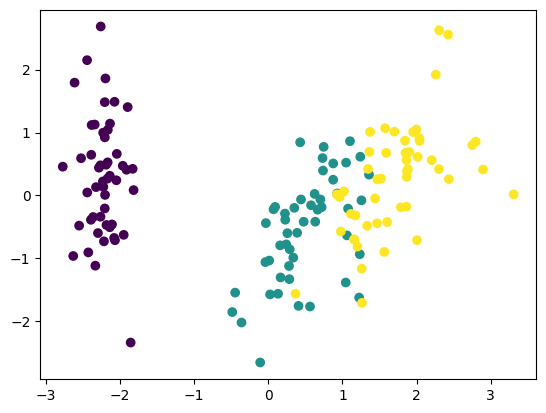

In [ ]:
plt.scatter(pca2[:,0],pca2[:,1],c=irisY)#c=irisY

In [ ]:
pca=PCA(n_components=3)
pca3=pca.fit_transform(irisX_std)

In [ ]:
pca3.shape

(150, 3)

In [ ]:
fig=px.scatter_3d(pca3,x=0,y=1,z=2,color=irisY)#color=irisY
fig.show()

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss=[]
K=range(1,10)

In [ ]:
for k in K:
  kmeans=KMeans(n_clusters=k)
  kmeans.fit(irisX)
  wcss.append(kmeans.inertia_)

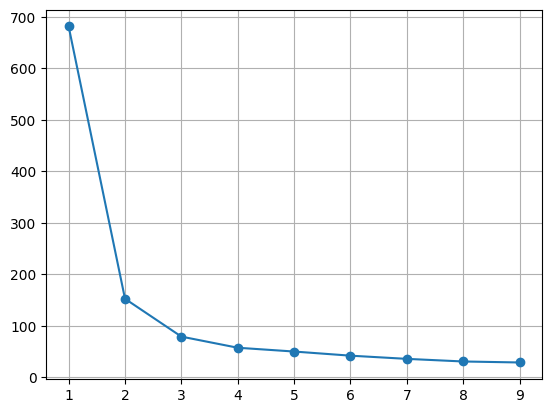

In [ ]:
plt.plot(K,wcss,marker='o')
plt.grid()

Metoda lokcia 2 lub 3

In [ ]:
def cluster_number(method_name):
  K=range(2,11)
  scores=[]
  for k in K:
    kmeans=KMeans(n_clusters=k)
    pred=kmeans.fit_predict(irisX)
    score=method_name(irisX,pred)
    scores.append(score)
  return scores

In [ ]:
def best_cluster_number(method_name, min_max):
  scores=cluster_number(method_name)
  K=range(2,11)
  plt.plot(K,scores,marker='o')
  plt.xlabel('Liczba klastrów')
  plt.ylabel(str(method_name))
  plt.grid()
  plt.show()
  if min_max=='min':
    best_k=K[np.argmin(scores)]
    best=min(scores)
  if min_max=='max':
    best_k=K[np.argmax(scores)]
    best=max(scores)
  print(f'Sugerowana liczba klastrów: {best_k}, Wartość miary: {best}')

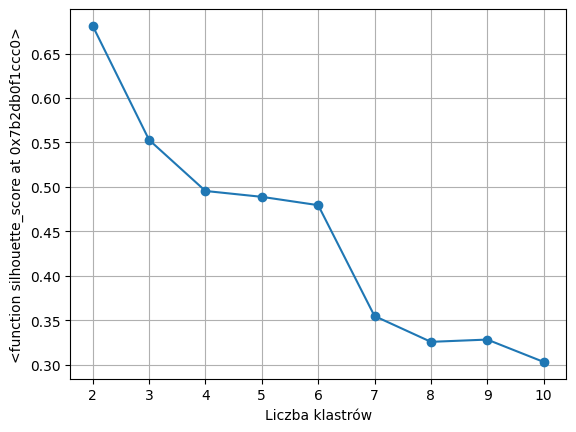

Sugerowana liczba klastrów: 2, Wartość miary: 0.6810461692117462


In [ ]:
from sklearn.metrics import silhouette_score
best_cluster_number(silhouette_score, 'max')

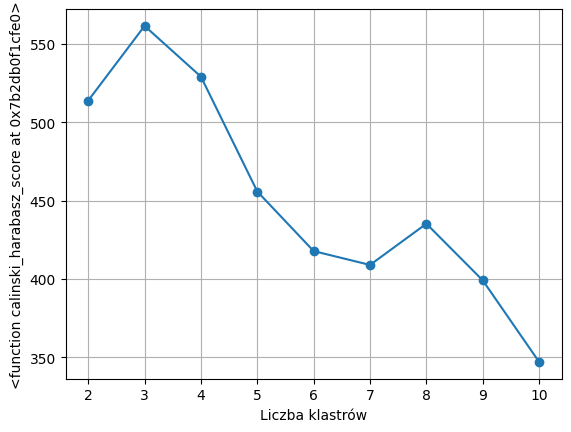

Sugerowana liczba klastrów: 3, Wartość miary: 561.5937320156642


In [ ]:
from sklearn.metrics import calinski_harabasz_score
best_cluster_number(calinski_harabasz_score, 'max')

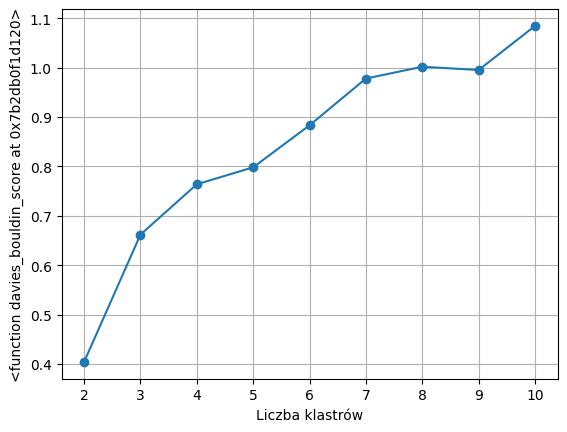

Sugerowana liczba klastrów: 2, Wartość miary: 0.40429283717304343


In [ ]:
from sklearn.metrics import davies_bouldin_score
best_cluster_number(davies_bouldin_score, 'min')

Metoda sylwetki 2
Metoda calinskiego-harabasz 3
Metoda bouldin 2

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan=DBSCAN()

In [ ]:
dbscan.fit(irisX)

DBSCAN()

In [ ]:
np.unique(dbscan.labels_)

array([-1,  0,  1])

In [ ]:
(dbscan.labels_==-1).sum()

np.int64(17)

In [ ]:
dbscan=DBSCAN(eps=0.3)

In [ ]:
dbscan.fit(irisX)

DBSCAN(eps=0.3)

In [ ]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2])

In [ ]:
(dbscan.labels_==-1).sum()

np.int64(96)

In [ ]:
model3=KMeans(n_clusters=3)

In [ ]:
model3.fit(irisX)

KMeans(n_clusters=3)

In [ ]:
pred=model3.predict(irisX)

In [ ]:
print(pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [ ]:
print(irisY)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
mapping=np.array([2,0,1])
pred_012=mapping[pred]

In [ ]:
print(pred_012)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [ ]:
print((pred_012==irisY).sum())

134


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(accuracy_score(pred_012, irisY))

0.8933333333333333


In [ ]:
model2=KMeans(n_clusters=2)

In [ ]:
model2.fit(irisX)

KMeans(n_clusters=2)

In [ ]:
pred=model2.predict(irisX)

In [ ]:
print(pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [ ]:
print(irisY)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
irisY_01=np.where(irisY==2,1,irisY)

In [ ]:
irisY_01

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
print((pred==irisY_01).sum())

147


In [ ]:
print(accuracy_score(pred, irisY_01))

0.98
